<a href="https://colab.research.google.com/github/DS3001/group2/blob/main/DS3001_Group_2_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# DS 3001: Project 2 - Stroke
**Group 2: Elaine Zhang, Eric Nguyen, Cheryl Bai, Hieu Vu,**
  - zzb2rf, wvu9cs, brr2tu
  - Any questions or comments about this report should be directed to the authors.



---
## Import Statements

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


---
## Data Cleaning:
  - In this section, we perform data cleaning techniques to make the dataset acceptable for data manipulation. Techniques included loading the provided dataset into the notebook, defining the variables, testing missing and NAN values, dropping columns, and making categorical variables. These techniques set the foundation for further sections and is imperative to conduct properly.

Variable Definitions:
- **age**: Patient age, numeric
- **avg_glucose_level**: Blood sugar levels, numeric
- **bmi**: Body mass index, numeric
- **ever_married**: Ever married, dummy/character (Yes, No)
- **gender**: Male, Female, or Other, character
- **heart_disease**: Has heart disease, dummy
- **hypertension**: Has hypertension, dummy
- **id**: Study identification number
- **Residence_type**: Type of residence, dummy/character (Urban, Rural)
- **smoking_status**: Former, never, or current smoker, categorical
- **work_type**: Employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (Private), Self-employed (Self-employed)
- **stroke**: Suffered a stroke in the sample period

In [3]:
# read in both the training and the testing dataset
training_data = pd.read_csv('training_data.csv')
testing_data = pd.read_csv('testing_data.csv')
training_data.columns

Index(['Unnamed: 0', 'id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [4]:
print('Training size', training_data.shape)
print('Testing size', testing_data.shape)

Training size (4087, 13)
Testing size (1023, 13)


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4087 non-null   int64  
 1   id                 4087 non-null   int64  
 2   gender             4087 non-null   object 
 3   age                4087 non-null   float64
 4   hypertension       4087 non-null   int64  
 5   heart_disease      4087 non-null   int64  
 6   ever_married       4087 non-null   object 
 7   work_type          4087 non-null   object 
 8   Residence_type     4087 non-null   object 
 9   avg_glucose_level  4087 non-null   float64
 10  bmi                3928 non-null   float64
 11  smoking_status     4087 non-null   object 
 12  stroke             4087 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 415.2+ KB


In [6]:
# Checking for missing values
print("Training NaN --")
nan_details = training_data.isnull().sum()
for column, value in nan_details.items():
  if (value != 0):
    print(column, value)

print("Testing NaN --")
nan_details = testing_data.isnull().sum()
for column, value in nan_details.items():
  if (value != 0):
    print(column, value)

Training NaN --
bmi 159
Testing NaN --
bmi 42


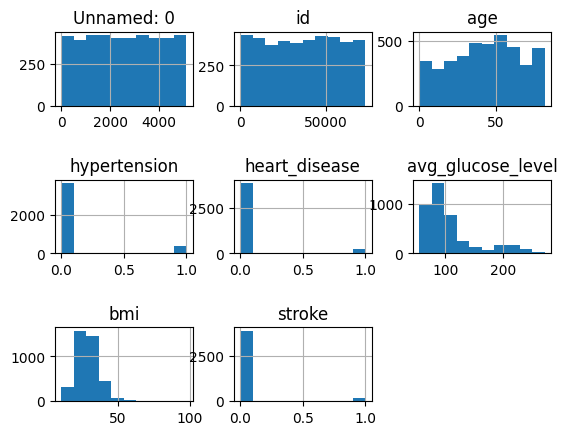

In [7]:
# looking at the spread
training_data.hist()
plt.subplots_adjust(hspace=1)
plt.show()

In [8]:
# drop Unamed: 0 because don't know what that column is
# drop id, because the id of the person should have no impact on the model
training_data = training_data.drop(columns=['Unnamed: 0', 'id'])
testing_data = testing_data.drop(columns=['Unnamed: 0', 'id'])

In [9]:
# Make hypertension, stroke, heart_disease categorical because they are binary labels
binary_columns = ['hypertension', 'heart_disease', 'stroke']
training_data[binary_columns] = training_data[binary_columns].astype('object')
testing_data[binary_columns] = testing_data[binary_columns].astype('object')

## Data Visualization
  - To effectively understand the data, we've performed several data visualizations that highlight different aspects of the training data. Initial charts include data exploration and latter graphs will provide complex relationships between variables. Creating data visualizations is an important aspect of any project as it helps make the data accessible and understandable for the wider audience. Any questions regarding these charts should be directed to the authors.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode the categorical variables to view them in the correlation matrix
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

one_hot_encoder = OneHotEncoder()
encoded_data = one_hot_encoder.fit_transform(training_data[categorical_columns]).toarray()

encoded_columns = one_hot_encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

training_data_encoded = training_data.drop(columns=categorical_columns)
training_data_encoded = pd.concat([training_data_encoded, encoded_df], axis=1)

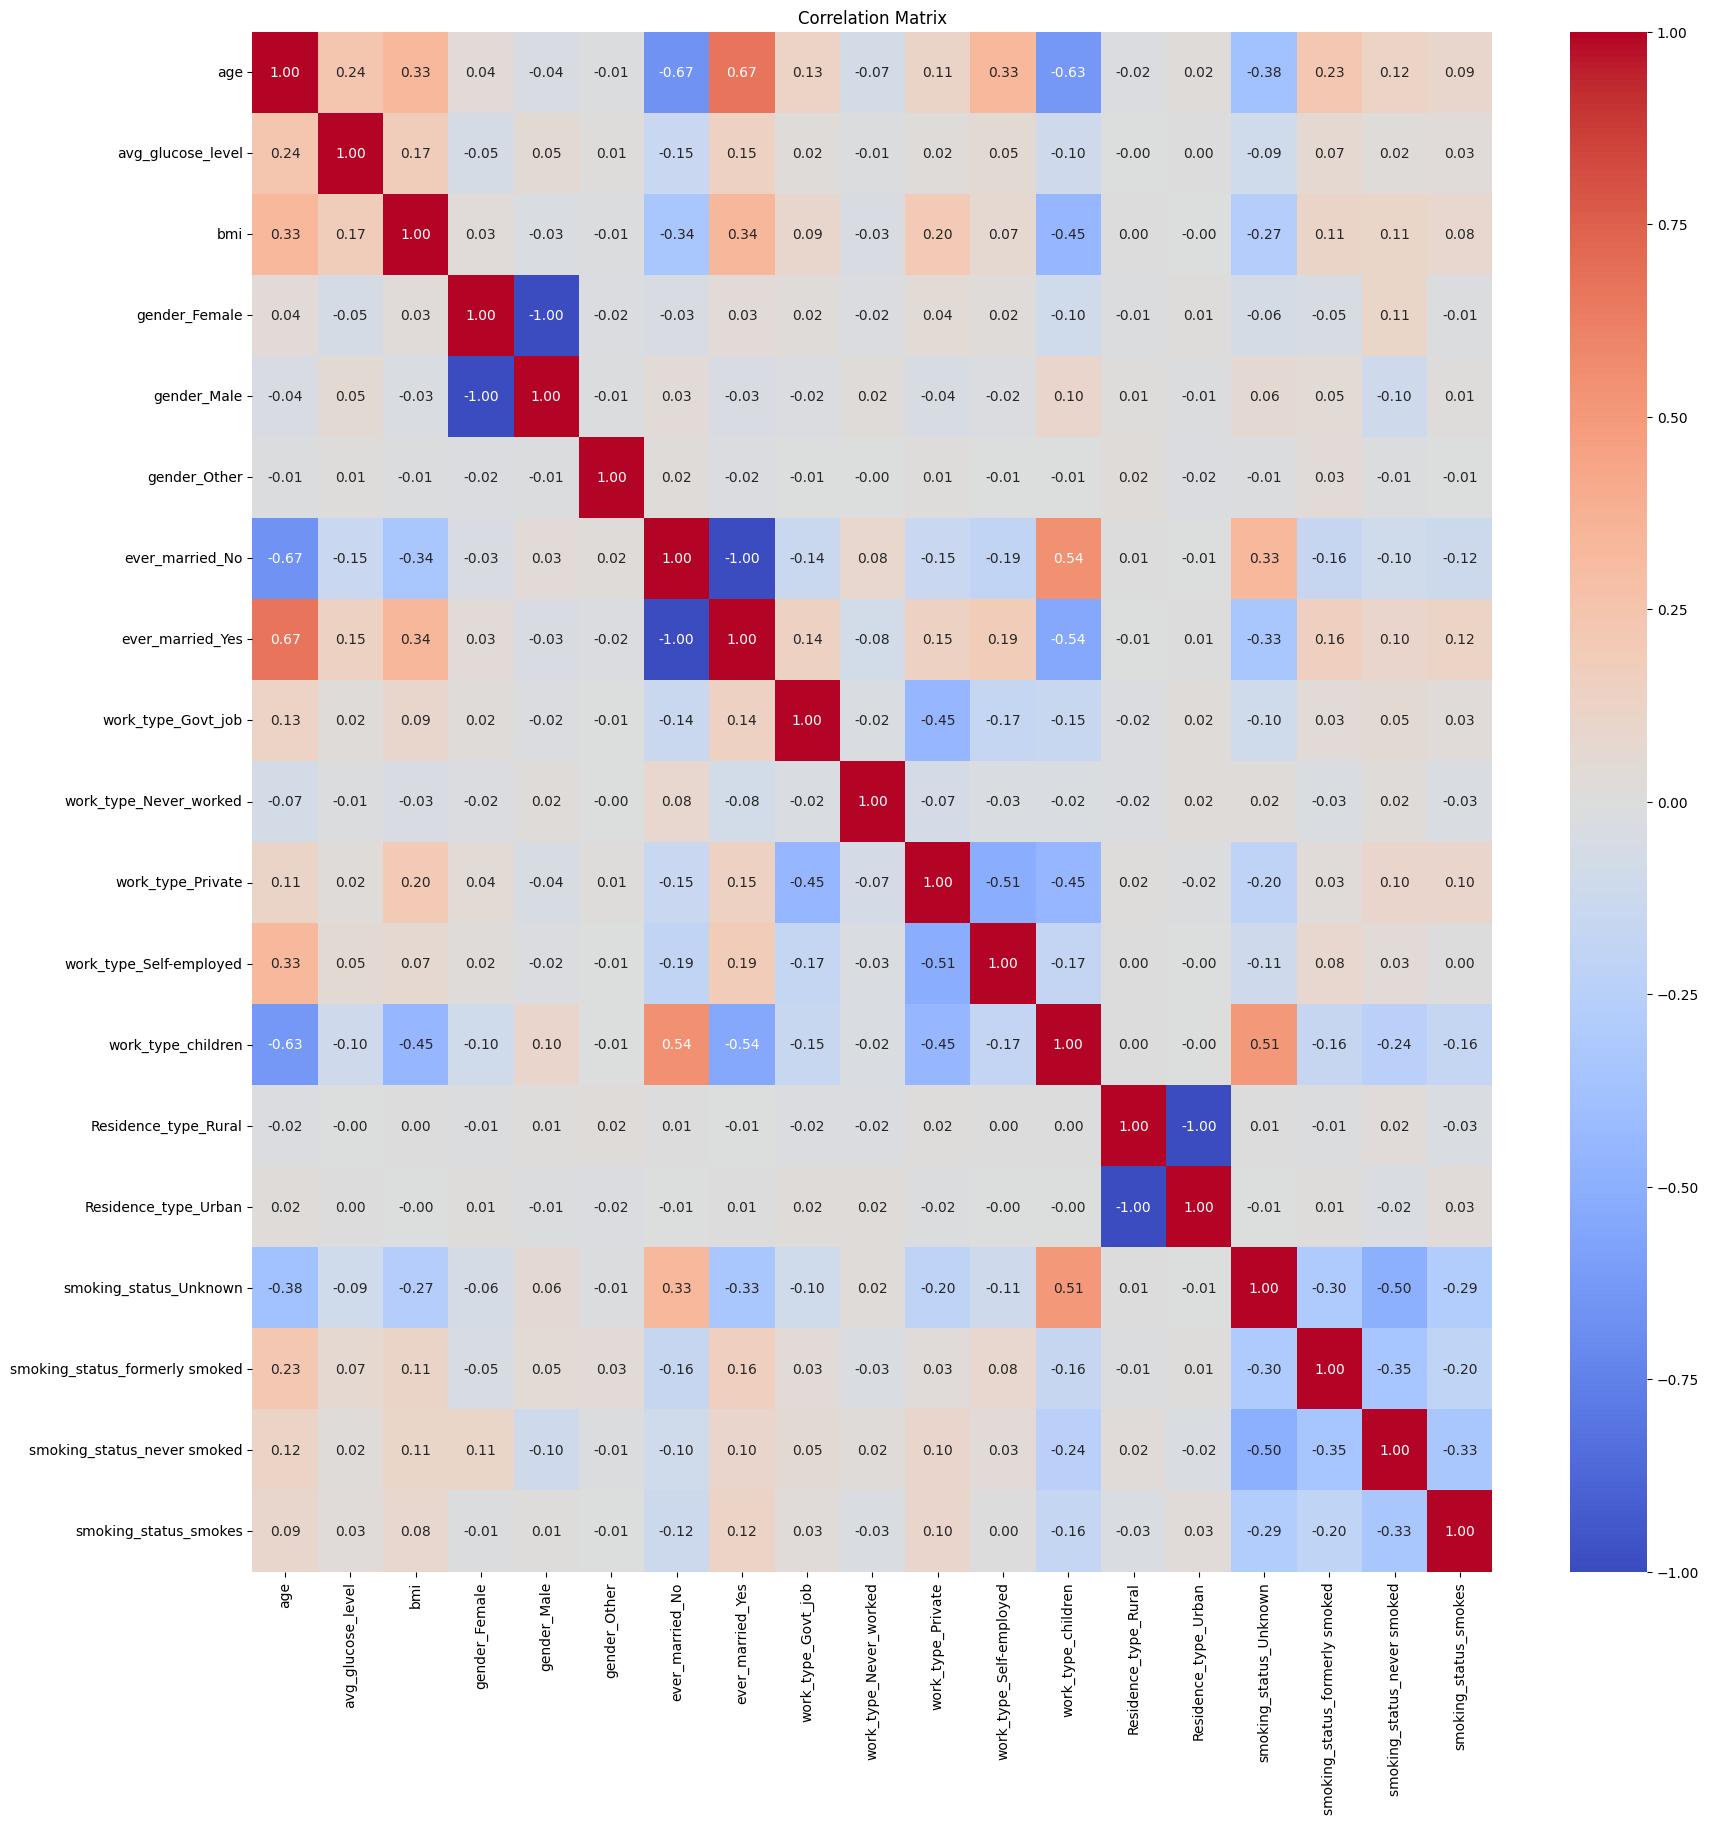

In [11]:
import plotly.express as px

# Visualize the correlation matrix using a heatmap
correlation_matrix_encoded = training_data_encoded.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

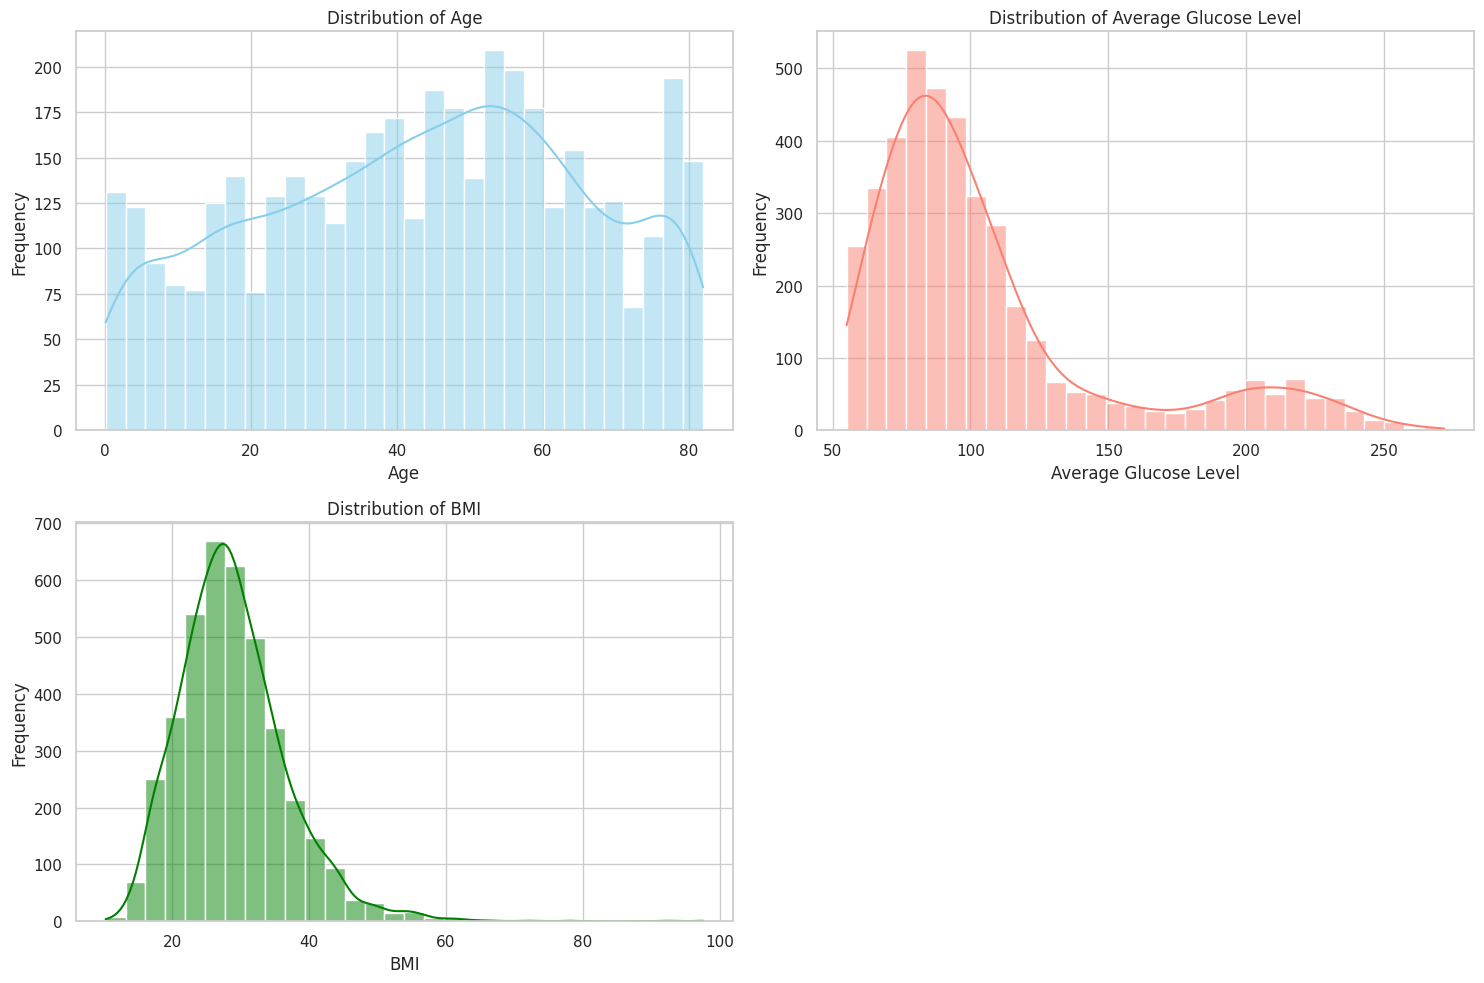

In [17]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(training_data['age'], bins=30, kde=True, color='skyblue', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(training_data['avg_glucose_level'], bins=30, kde=True, color='salmon', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Average Glucose Level')
axs[0, 1].set_xlabel('Average Glucose Level')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(training_data['bmi'].dropna(), bins=30, kde=True, color='green', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of BMI')
axs[1, 0].set_xlabel('BMI')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

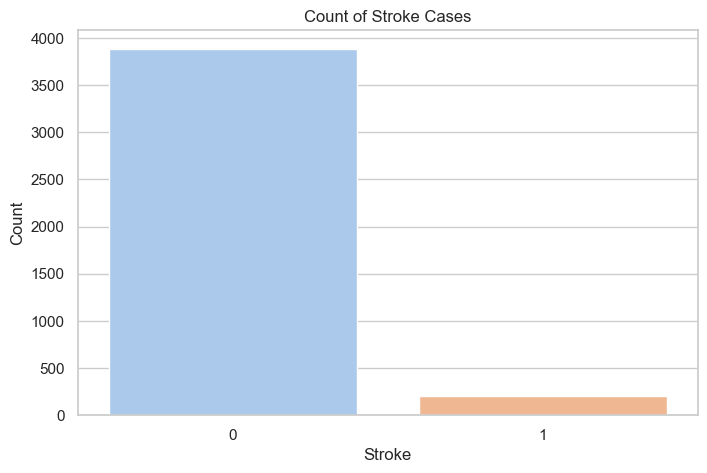

In [ ]:
# Visualize the count of strokes
plt.figure(figsize=(8, 5))
sns.countplot(x='stroke', data=training_data, palette='pastel')
plt.title('Count of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

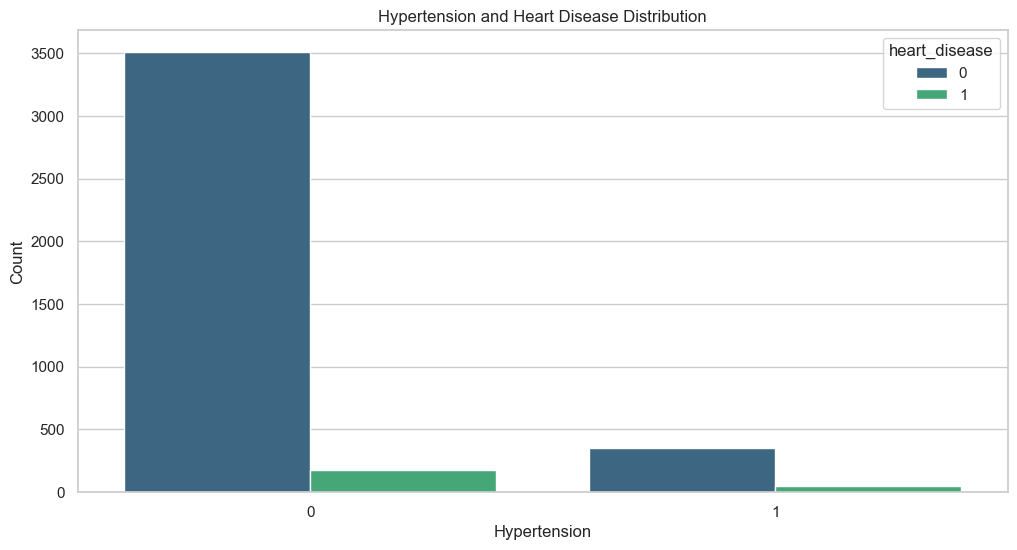

In [ ]:
# Visualize the distribution of hypertension and heart disease
plt.figure(figsize=(12, 6))
sns.countplot(x='hypertension', data=training_data, hue='heart_disease', palette='viridis')
plt.title('Hypertension and Heart Disease Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

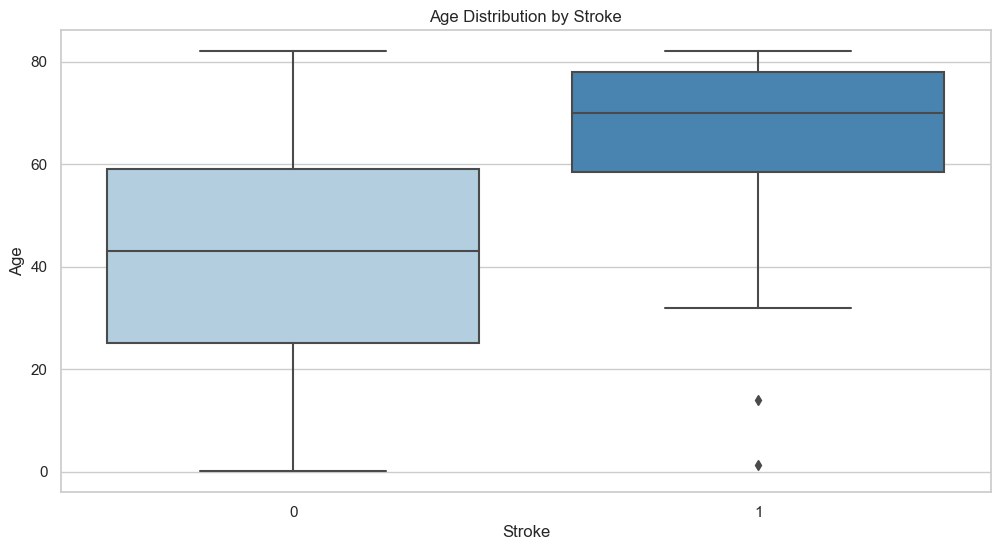

In [ ]:
# Visualize the relationship between age and stroke
plt.figure(figsize=(12, 6))
sns.boxplot(x='stroke', y='age', data=training_data, palette='Blues')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

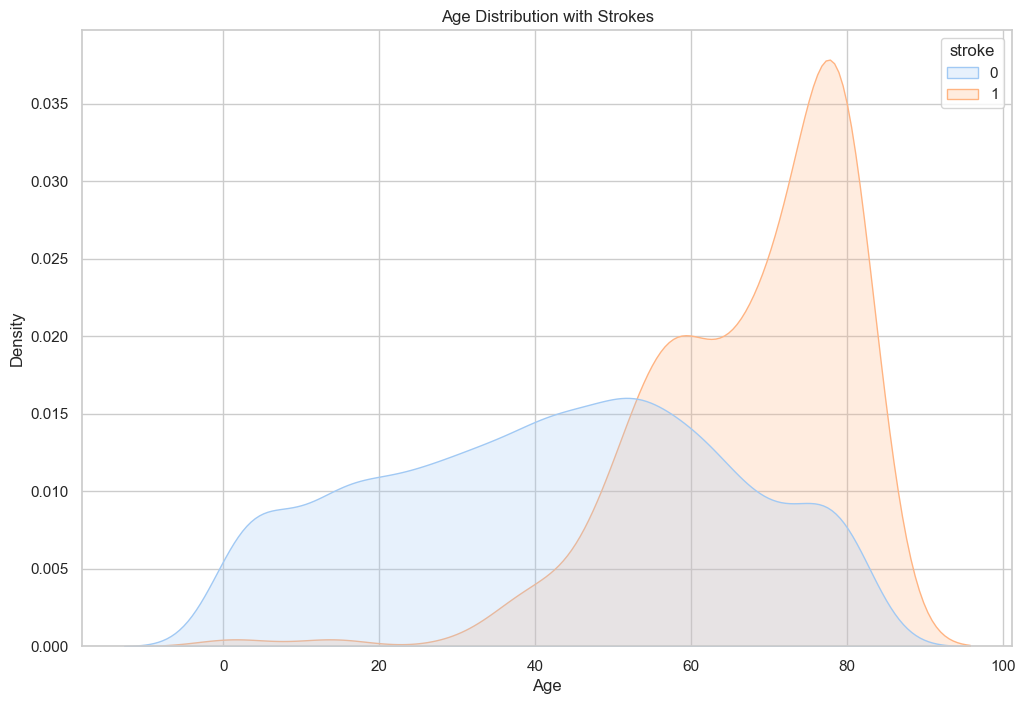

In [ ]:
# Age distribution with strokes
plt.figure(figsize=(12, 8))
sns.kdeplot(data=training_data, x='age', hue='stroke', common_norm=False, fill=True, palette='pastel')
plt.title('Age Distribution with Strokes')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

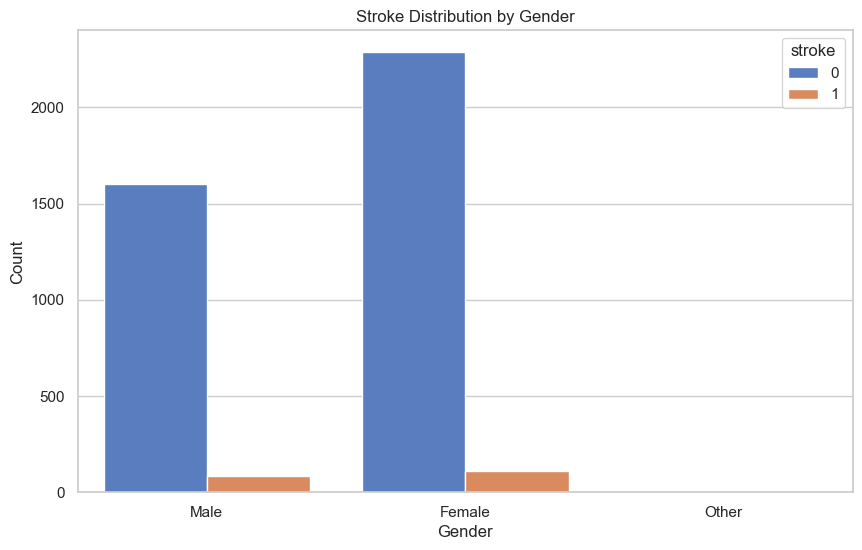

In [ ]:
# Visualize the distribution of stroke by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=training_data, hue='stroke', palette='muted')
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [18]:
# Interactive scatter plot for age vs. glucose level with stroke as color
fig = px.scatter(training_data, x='age', y='avg_glucose_level', color='stroke',
                 labels={'avg_glucose_level': 'Average Glucose Level'},
                 title='Scatter Plot of Age vs. Average Glucose Level with Stroke Color')
fig.show()

In [19]:
# Interactive bar plot for work type and stroke count
work_type_stroke_count = training_data.groupby(['work_type', 'stroke']).size().reset_index(name='count')
fig = px.bar(work_type_stroke_count, x='work_type', y='count', color='stroke',
             labels={'count': 'Count', 'work_type': 'Work Type'},
             title='Bar Plot of Stroke Count by Work Type')
fig.show()

In [ ]:
# Interactive pie chart for smoking status distribution
smoking_status_distribution = training_data['smoking_status'].value_counts().reset_index(name='count')
fig = px.pie(smoking_status_distribution, values='count', names='smoking_status',
             title='Pie Chart of Smoking Status Distribution')
fig.show()

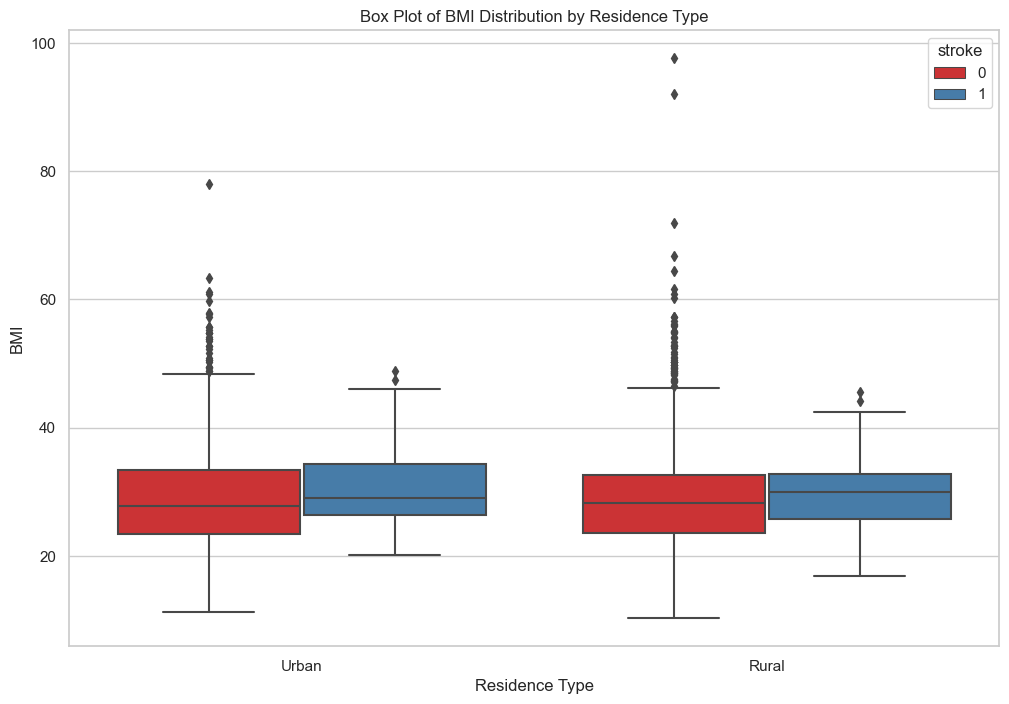

In [ ]:
# Box plot for BMI distribution by residence type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Residence_type', y='bmi', data=training_data, hue='stroke', palette='Set1')
plt.title('Box Plot of BMI Distribution by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Relationship between BMI and average glucose level with stroke as color
fig = px.scatter(training_data, x='bmi', y='avg_glucose_level', color='stroke',
                 labels={'avg_glucose_level': 'Average Glucose Level'},
                 title='Scatter Plot of BMI vs. Average Glucose Level with Stroke Color')
fig.show()

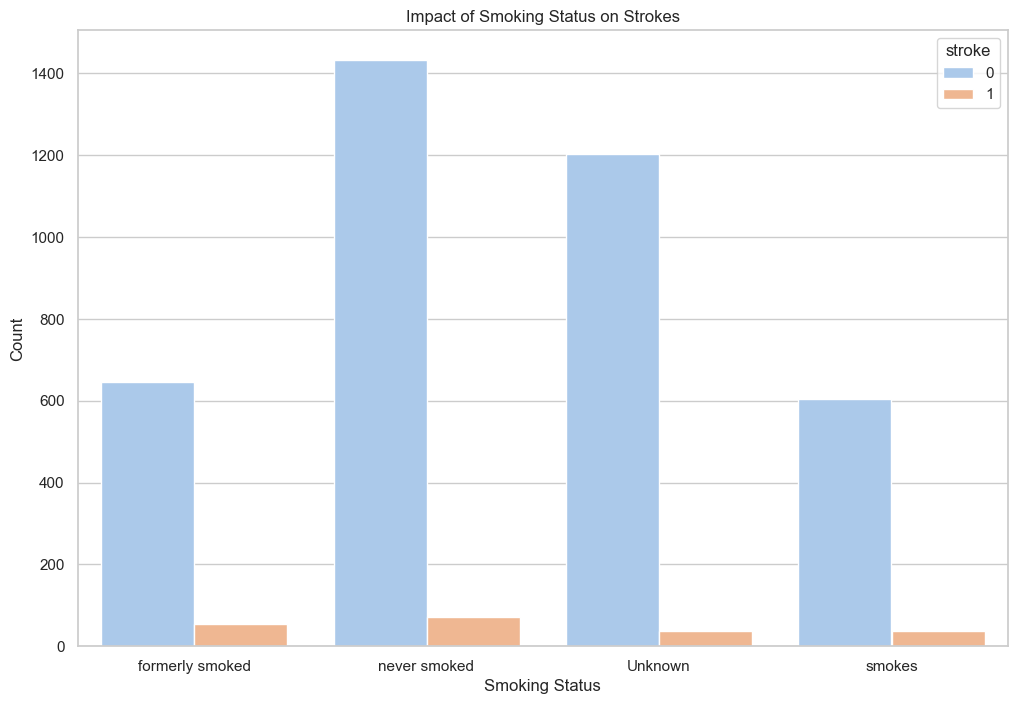

In [ ]:
# Smoking Status and Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='smoking_status', hue='stroke', data=training_data, palette='pastel')
plt.title('Impact of Smoking Status on Strokes')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

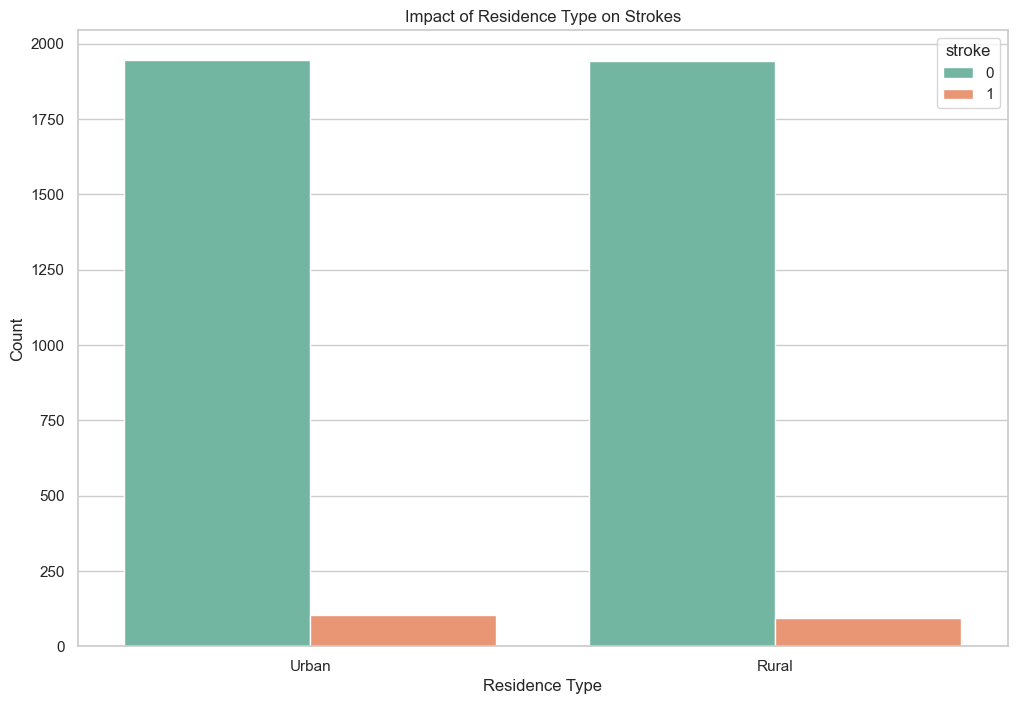

In [ ]:
# Residence Type and Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='Residence_type', hue='stroke', data=training_data, palette='Set2')
plt.title('Impact of Residence Type on Strokes')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

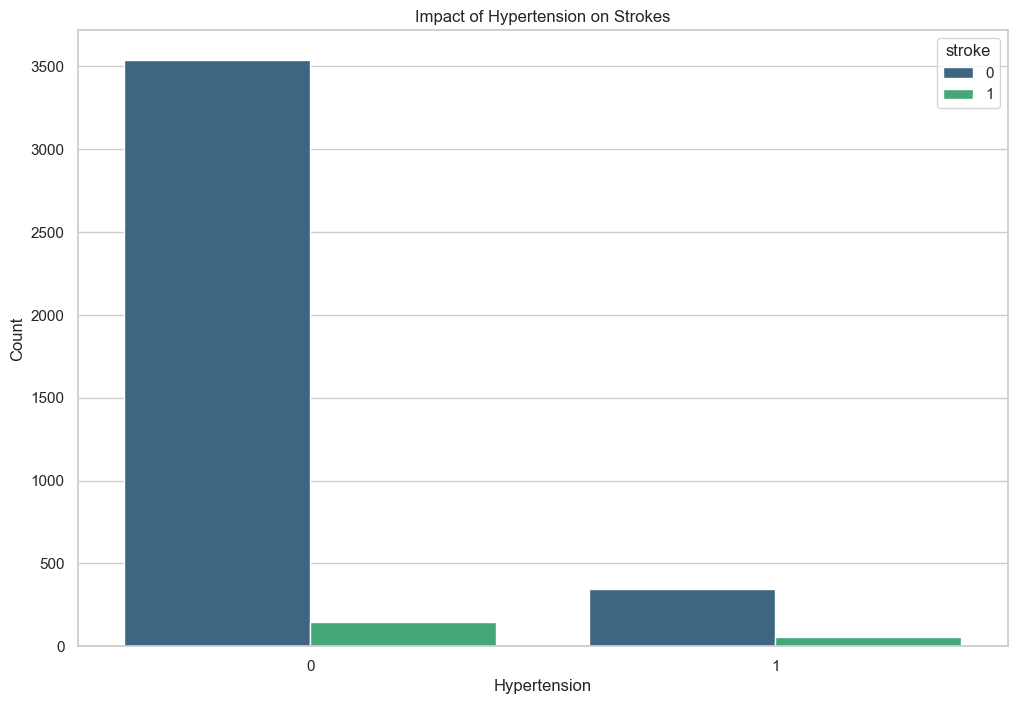

In [ ]:
# Hypertension and Heart Disease Impact on Stroke
plt.figure(figsize=(12, 8))
sns.countplot(x='hypertension', hue='stroke', data=training_data, palette='viridis')
plt.title('Impact of Hypertension on Strokes')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

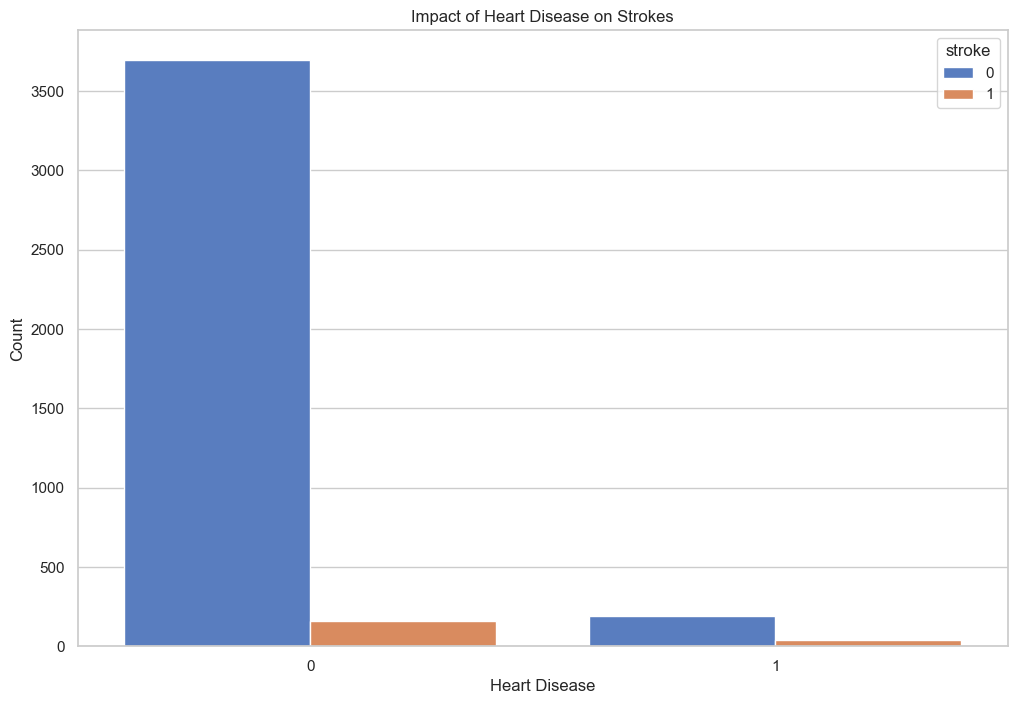

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='heart_disease', hue='stroke', data=training_data, palette='muted')
plt.title('Impact of Heart Disease on Strokes')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Work Type and Average Glucose Level
fig = px.box(training_data, x='work_type', y='avg_glucose_level', color='work_type',
             labels={'avg_glucose_level': 'Average Glucose Level'},
             title='Box Plot of Average Glucose Level by Work Type')
fig.show()

In [ ]:
# Gender and Average Glucose Level
fig = px.box(training_data, x='gender', y='avg_glucose_level', color='gender',
             labels={'avg_glucose_level': 'Average Glucose Level'},
             title='Box Plot of Average Glucose Level by Gender')
fig.show()

In [ ]:
# Age and Smoking Status
fig = go.Figure()

for status in training_data['smoking_status'].unique():
    subset = training_data[training_data['smoking_status'] == status]
    fig.add_trace(go.Box(x=subset['smoking_status'], y=subset['age'], name=status))

fig.update_layout(title='Box Plot of Age by Smoking Status',
                  xaxis_title='Smoking Status',
                  yaxis_title='Age')
fig.show()

---
## Models
  - To effectively model the data, we have utilized several machine learning models in order to build and test our models. We used the k-nearest neighbor, linear, and decision tree models in order to experiment with multiple hyperparameters and iterate on model designs. Any questions regarding these charts should be directed to the authors.

In [ ]:
# split data into features and the target labels
X_train = training_data.drop(columns=['stroke'])
y_train = training_data["stroke"].copy()

X_test = testing_data.drop(columns=['stroke'])
y_test = testing_data["stroke"].copy()

In [ ]:
training_num = X_train.select_dtypes(include=[np.number])
training_cat = X_train.select_dtypes(exclude=[np.number])
num_attribs = list(training_num)
cat_attribs = list(training_cat)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("std_scaler", StandardScaler()),

])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown="infrequent_if_exist"), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

In [ ]:
# simple linear regression (no polynomial features)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg = LinearRegression().fit(X_train_prepared, y_train)
y_pred = reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.08190438686502433
RMSE on test set: 0.20659021361671462


In [ ]:
# linear model (polynomial features degree = 2)
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2)
X_train_prepared_poly = polynomial.fit_transform(X_train_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(X_train_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.052346340296569926
RMSE on test set: 0.2098894505522819


In [ ]:
# linear model (polynomial features degree = 3)
polynomial = PolynomialFeatures(degree=3)
X_train_prepared_poly = polynomial.fit_transform(X_train_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(X_train_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: -5.700131845524543e+18
RMSE on test set: 514764085.6125451


In [ ]:
# decision tree (depth = 1)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.06852453491795651
RMSE on test set: 0.20809013821224912


In [ ]:
# decision tree (depth = 2)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07934294088245286
RMSE on test set: 0.20687820164821544


In [ ]:
# decision tree (depth = 3)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07256700630007884
RMSE on test set: 0.20763810640010064


In [ ]:
# decision tree (depth = 4)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.07555497004577583
RMSE on test set: 0.20730335680004366


In [ ]:
# decision tree (depth = 5)
from sklearn import tree
tree_reg = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg = tree_reg.fit(X_train_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.017222781063939485
RMSE on test set: 0.213743702983762


In [ ]:
# knn with k = 3
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

model = kNNRegression(n_neighbors = 3)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: -0.2429736211031175
RMSE on test set: 0.24037912200990197
SSE:  59.11111111111107


In [ ]:
# knn with k = 5
model = kNNRegression(n_neighbors = 5)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: -0.11362959917780069
RMSE on test set: 0.22752869261447964
SSE:  52.959999999999994


In [ ]:
# knn with k = 10
model = kNNRegression(n_neighbors = 10)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: -0.014378622816032971
RMSE on test set: 0.21715299956468792
SSE:  48.239999999999995


In [ ]:
# knn with k = 1000
model = kNNRegression(n_neighbors = 1000)
fitted_model = model.fit(X_train_prepared, y_train)
y_pred = fitted_model.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))
sse = np.sum( (y_test - y_pred)**2 )
print("SSE: ", sse)


R2 Score on test set: 0.0541752251387464
RMSE on test set: 0.20968681902383912
SSE:  44.97983899999997


In [ ]:
#trying a lot of k values for knn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

k_values = [20, 30, 50, 200, 250, 290, 300, 310, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 1100, 1200]
performance_rmse = []
performance_r2 = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_train_prepared, y_train)
    y_pred = knn.predict(X_test_prepared)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    performance_rmse.append(rmse)
    performance_r2[k] = r2

best_k = k_values[performance_rmse.index(min(performance_rmse))]
best_rmse = min(performance_rmse)
best_r2 = performance_r2[best_k]

print(f"Best k value: {best_k}")
print(f"RMSE with best k: {best_rmse}")
print(f"R2 Score with best k: {best_r2}")


Best k value: 300
RMSE with best k: 0.20765916987996
R2 Score with best k: 0.07237883316204141


In [ ]:
# trying a lot of depth values for Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
performance_rmse = []
performance_r2 = {}

for depth in max_depth_values:
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train_prepared, y_train)
    y_pred = tree_reg.predict(X_test_prepared)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    performance_rmse.append(rmse)
    performance_r2[depth] = r2

best_depth = max_depth_values[performance_rmse.index(min(performance_rmse))]
best_rmse = min(performance_rmse)
best_r2 = performance_r2[best_depth]

print(f"Best max_depth value: {best_depth}")
print(f"RMSE with best max_depth: {best_rmse}")
print(f"R2 Score with best max_depth: {best_r2}")





Best max_depth value: 2
RMSE with best max_depth: 0.20687820164821544
R2 Score with best max_depth: 0.07934294088245286
